In [43]:
!pip install opendatasets

In [44]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/blastchar/telco-customer-churn")

Skipping, found downloaded files in "./telco-customer-churn" (use force=True to force download)


In [45]:
import pandas as pd
data = pd.read_csv("/content/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [46]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [47]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [48]:
data.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [49]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'],errors = 'coerce')
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [50]:
data.dropna(inplace = True)

In [51]:
churn_counts = data['Churn'].value_counts()
print(churn_counts)

Churn
No     5163
Yes    1869
Name: count, dtype: int64


In [52]:
import matplotlib.pyplot as plt
import seaborn as sns


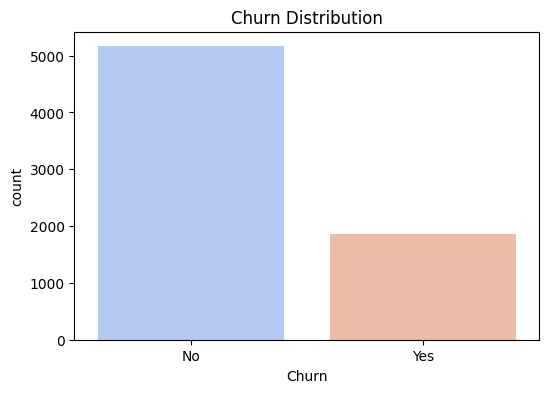

In [53]:
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Churn', palette='coolwarm')
plt.title('Churn Distribution')
plt.show()

In [54]:
data[['tenure','MonthlyCharges','TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


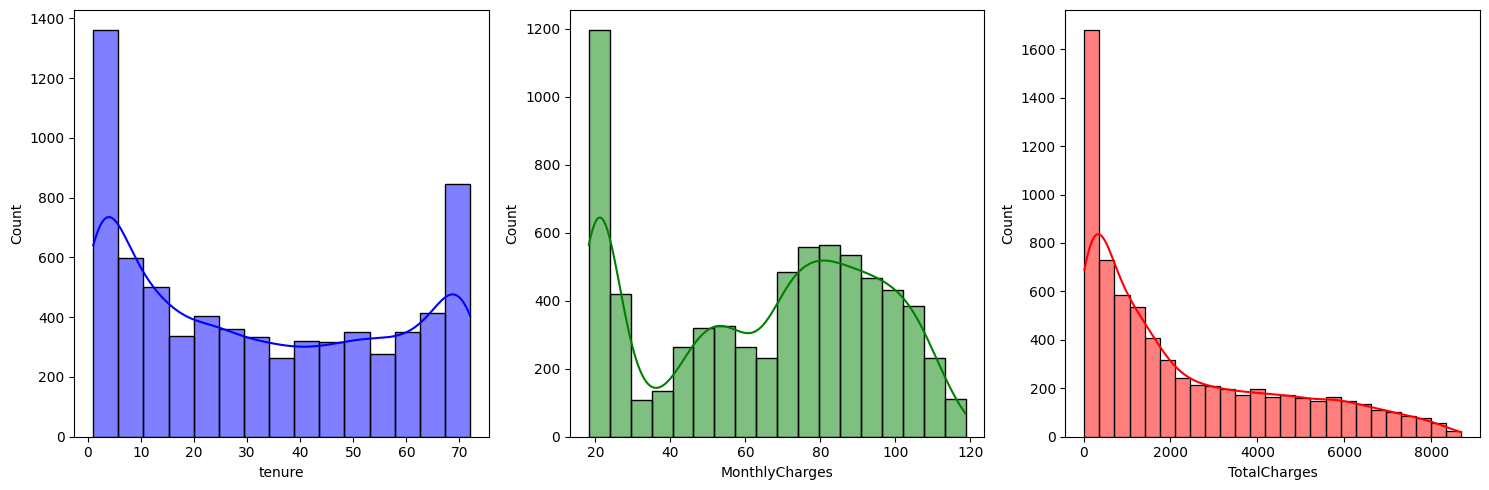

In [55]:
fig,ax = plt.subplots(1,3,figsize=(15,5))
sns.histplot(data['tenure'],kde = True,ax = ax[0],color = 'blue')
sns.histplot(data["MonthlyCharges"],kde = True,ax = ax[1],color = 'green')
sns.histplot(data['TotalCharges'],kde = True,ax = ax[2],color = "red")
plt.tight_layout()
plt.show()

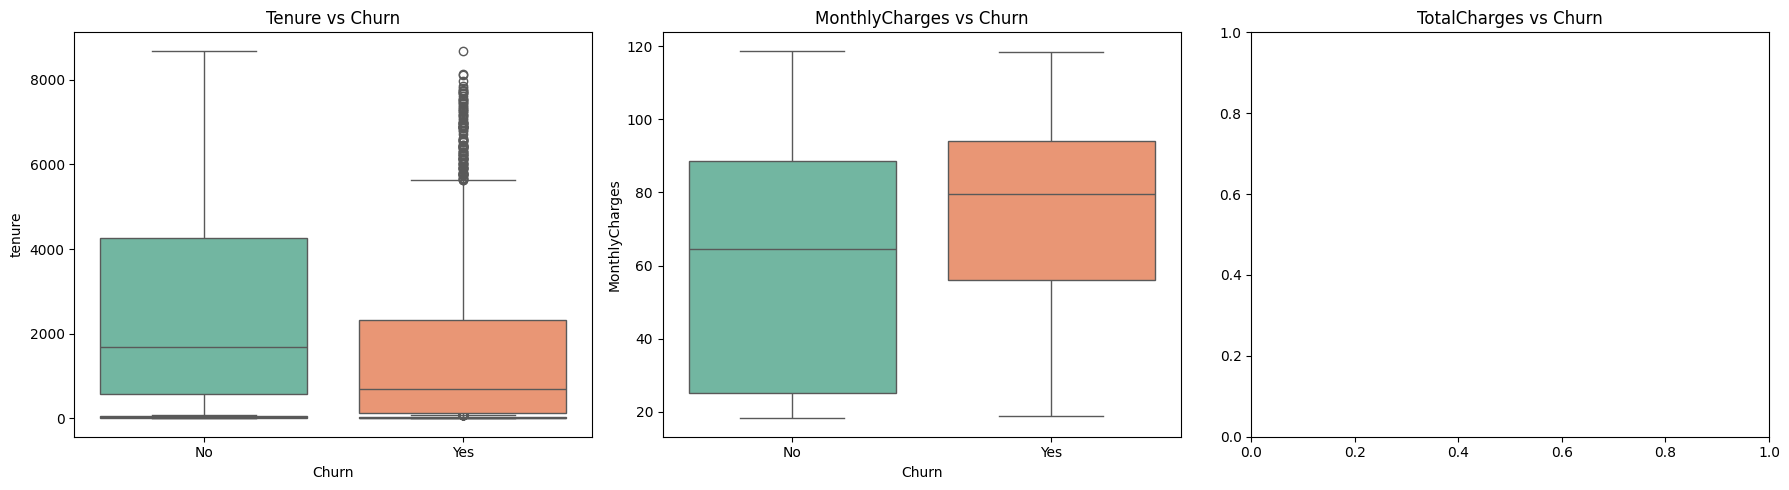

In [56]:
fig,ax = plt.subplots(1,3 ,figsize = (18,5))

sns.boxplot(data = data ,x ='Churn',y = 'tenure',ax = ax[0],palette = 'Set2')
sns.boxplot(data = data ,x ='Churn',y = 'MonthlyCharges',ax = ax[1],palette = 'Set2')
sns.boxplot(data = data ,x ='Churn',y = 'TotalCharges',ax = ax[0],palette = 'Set2')

ax[0].set_title('Tenure vs Churn')
ax[1].set_title('MonthlyCharges vs Churn')
ax[2].set_title('TotalCharges vs Churn')
plt.tight_layout()
plt.show()



In [57]:
categorical_cols = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

In [58]:
def plot_churn_rate(col, ax):
    churn_rate = data.groupby(col)['Churn'].apply(lambda x: (x == 'Yes').mean()).sort_values()
    churn_rate.plot(kind='barh', ax=ax, color='skyblue', edgecolor='black')
    ax.set_title(f'Churn Rate by {col}')
    ax.set_xlabel('Churn Rate')
    ax.axvline(x=data['Churn'].eq('Yes').mean(), color='red', linestyle='--', label='Avg Churn')
    ax.legend()

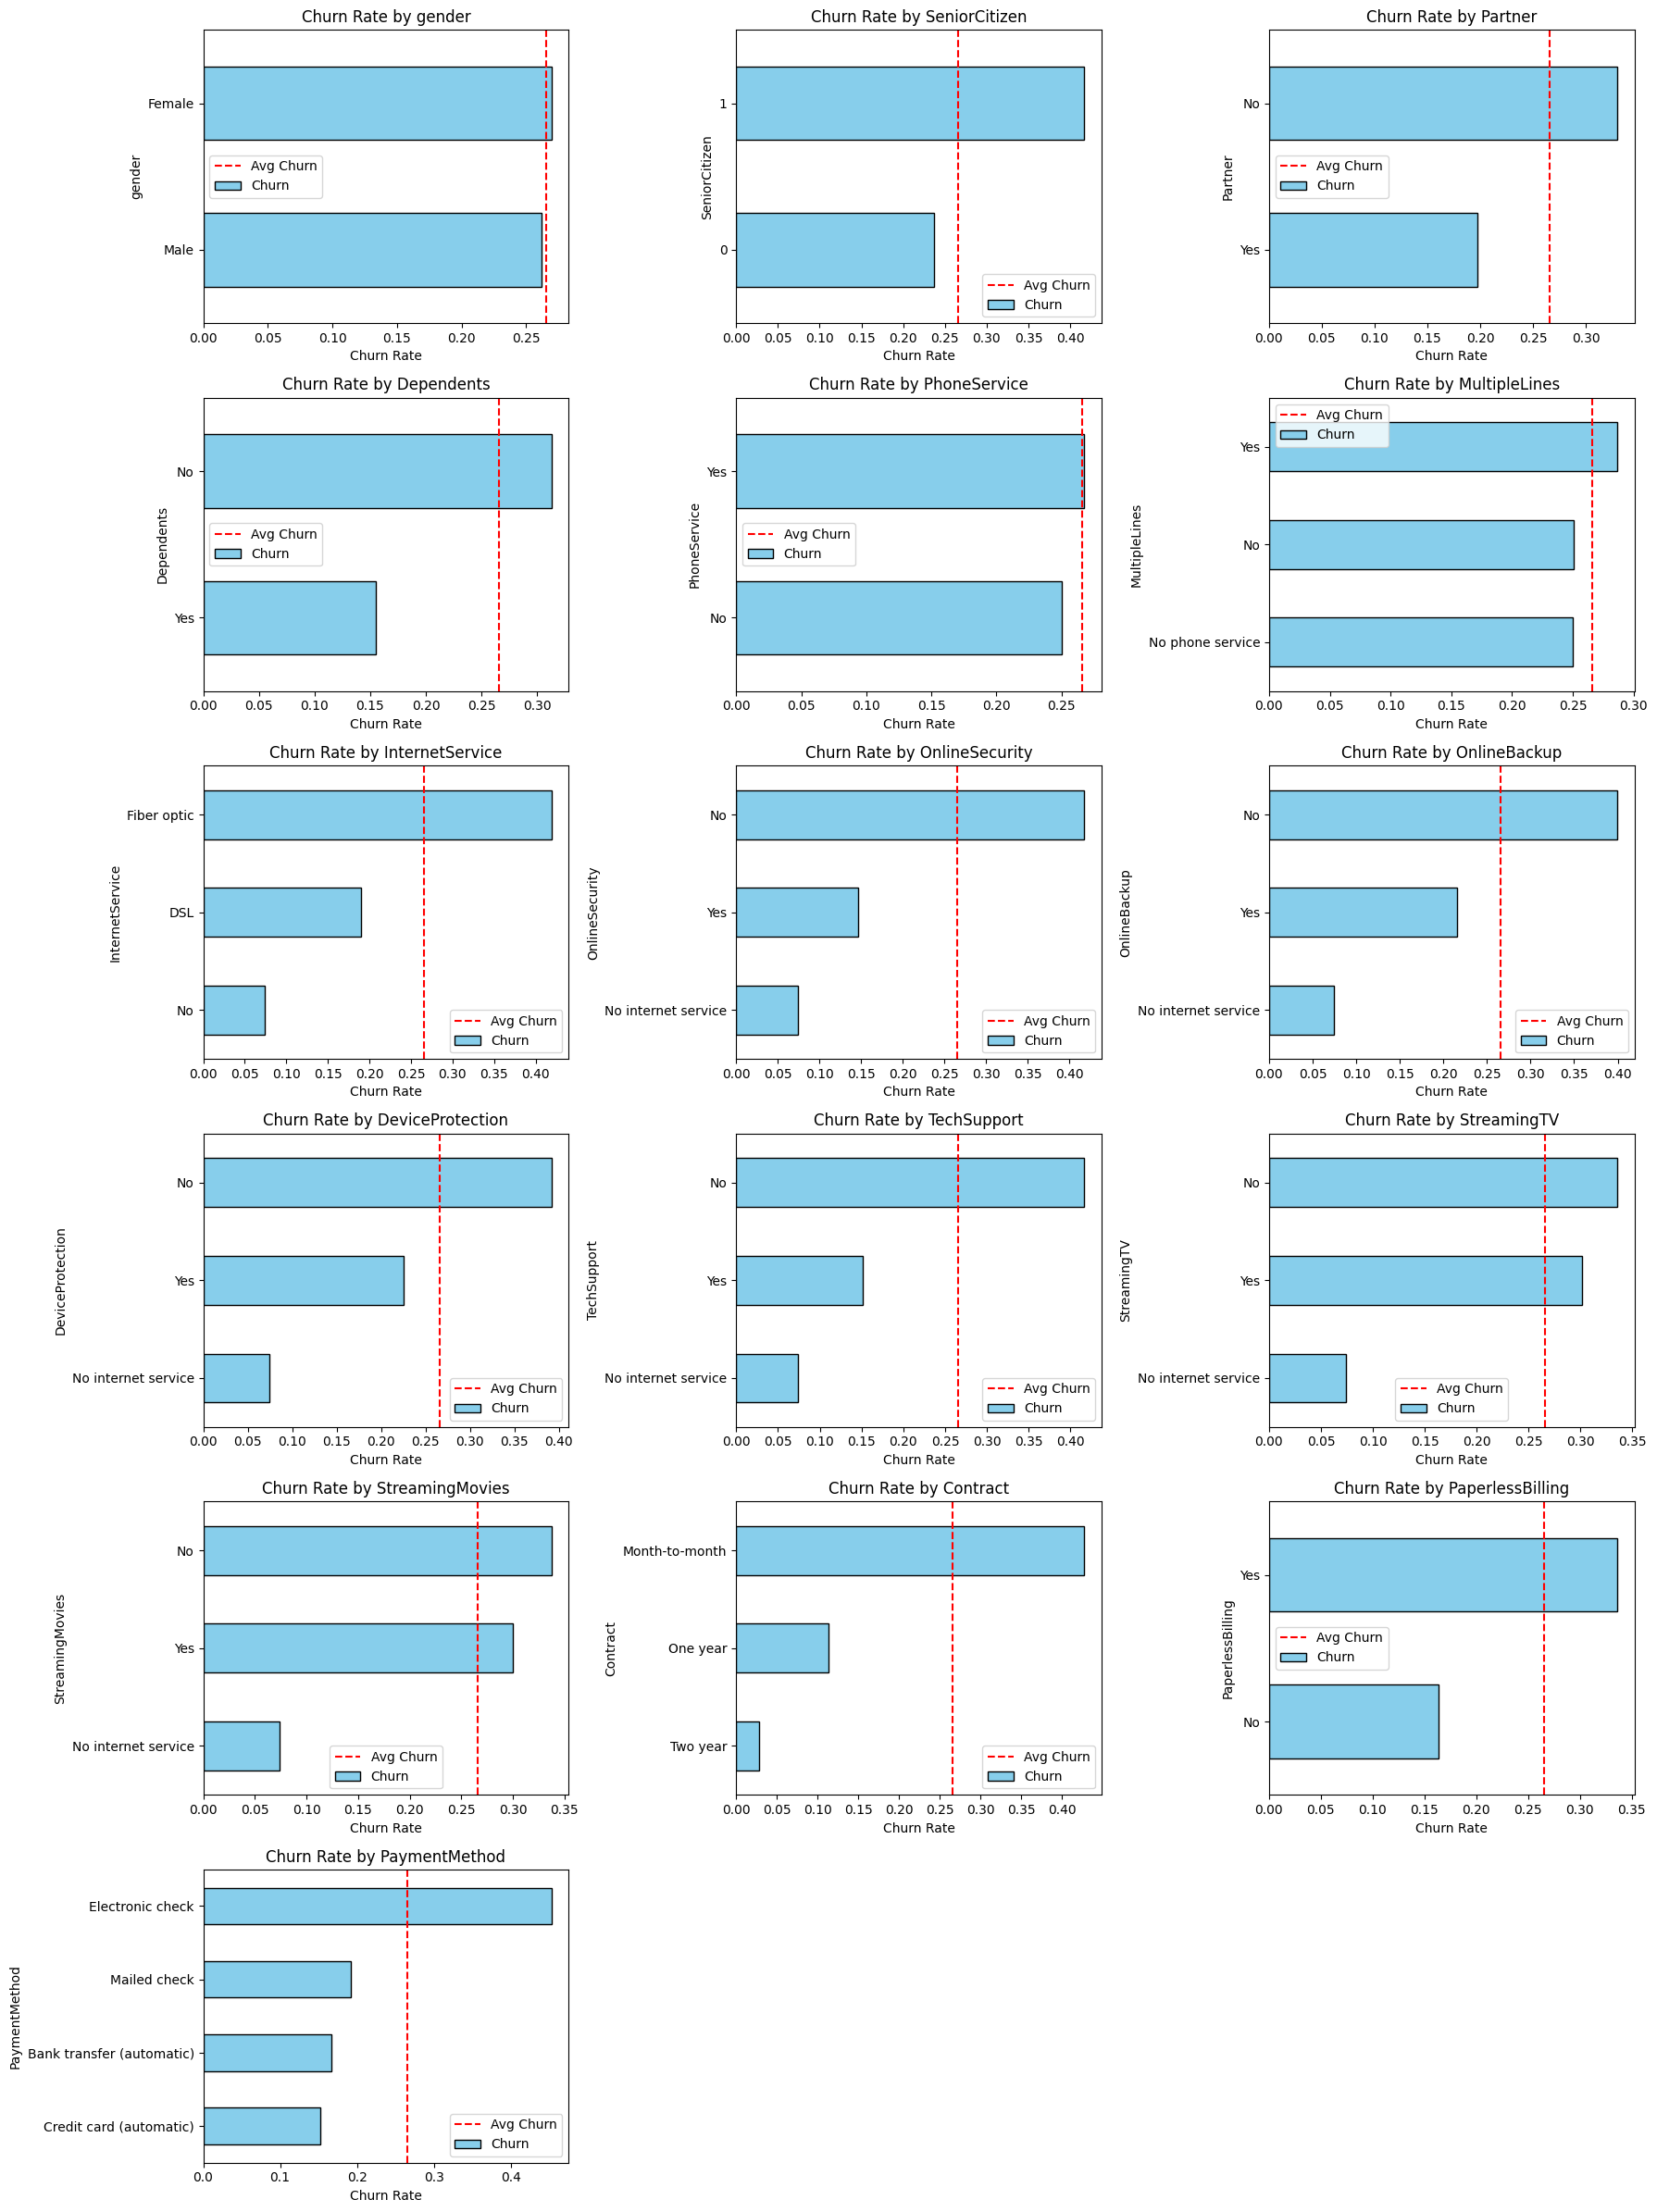

In [59]:
n = len(categorical_cols)
rows = (n//3)+1
fig,axes = plt.subplots(rows,3,figsize = (18,4*rows))
axes = axes.flatten()

for i ,col in enumerate(categorical_cols):
  plot_churn_rate(col,axes[i])

for j in range(i+1,len(axes)):
  fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

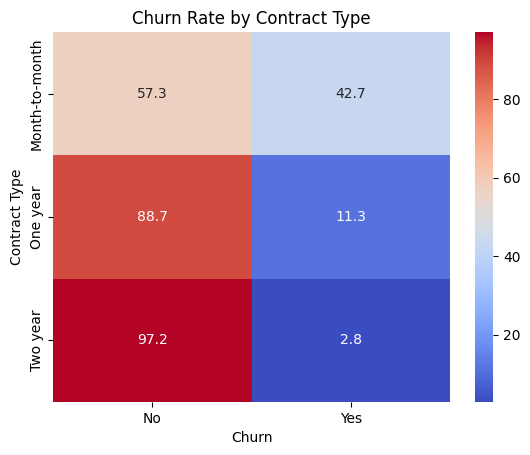

In [60]:
crosstab_result = pd.crosstab(data['Contract'], data['Churn'], normalize='index') * 100
sns.heatmap(crosstab_result, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Churn Rate by Contract Type')
plt.ylabel('Contract Type')
plt.xlabel('Churn')
plt.show()

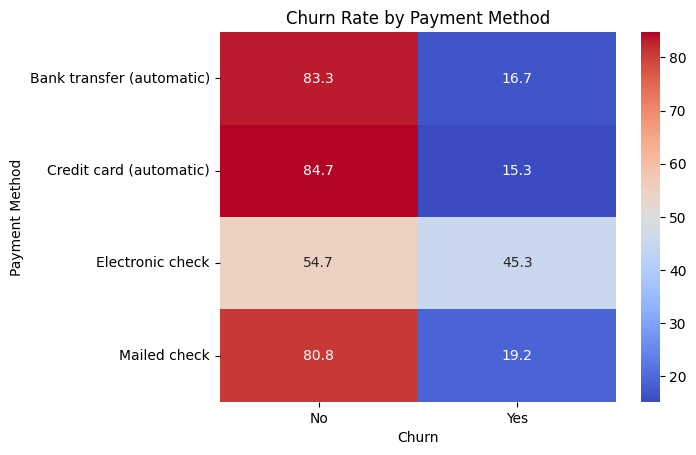

In [61]:
crosstab_result = pd.crosstab(data['PaymentMethod'], data['Churn'], normalize='index') * 100
sns.heatmap(crosstab_result, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Churn Rate by Payment Method')
plt.ylabel('Payment Method')
plt.xlabel('Churn')
plt.show()

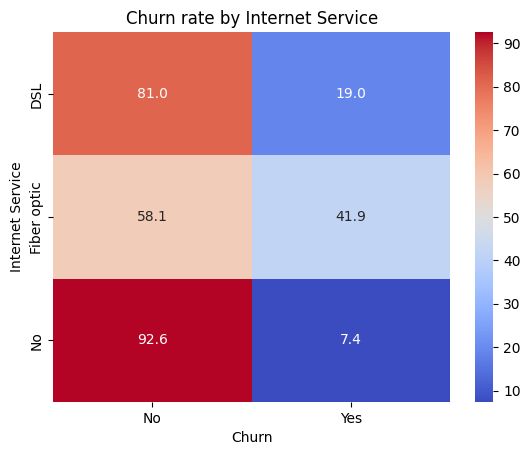

In [62]:
crosstab_result = pd.crosstab(data['InternetService'], data['Churn'], normalize='index') * 100
sns.heatmap(crosstab_result,annot = True,fmt = ".1f",cmap = 'coolwarm')
plt.title("Churn rate by Internet Service")
plt.ylabel("Internet Service")
plt.xlabel("Churn")
plt.show()

In [63]:
no_support = data[data['OnlineSecurity'] == 'No']['Churn'].eq('Yes').mean()
with_support = data[data['OnlineSecurity'] == 'Yes']['Churn'].eq('Yes').mean()
print(f"Churn rate without OnlineSecurity: {no_support:.1%}")
print(f"Churn rate with OnlineSecurity: {with_support:.1%}")

Churn rate without OnlineSecurity: 41.8%
Churn rate with OnlineSecurity: 14.6%


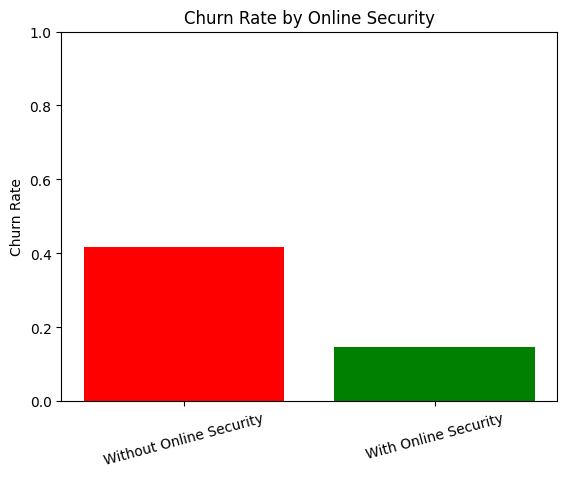

In [64]:
labels = ['Without Online Security', 'With Online Security']
churn_rates = [no_support, with_support]

plt.bar(labels, churn_rates, color=['red', 'green'])
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Online Security')
plt.ylim(0, 1)  # Set y-axis limits to 0-1 for percentage representation
plt.xticks(rotation=15)
plt.show()

In [65]:
data.groupby('PaymentMethod')['Churn'].apply(lambda x : (x == "Yes").mean()).sort_values()

,Churn
PaymentMethod,
Credit card (automatic),0.152531
Bank transfer (automatic),0.167315
Mailed check,0.192020
Electronic check,0.452854


In [66]:
pd.crosstab([data['Contract'], data['InternetService']], data['Churn'], normalize='index') * 100

Churn                                  No        Yes
Contract       InternetService                      
Month-to-month DSL              67.784137  32.215863
               Fiber optic      45.394737  54.605263
               No               81.106870  18.893130
One year       DSL              90.701754   9.298246
               Fiber optic      80.705009  19.294991
               No               97.520661   2.479339
Two year       DSL              98.073836   1.926164
               Fiber optic      92.773893   7.226107
               No               99.210111   0.789889

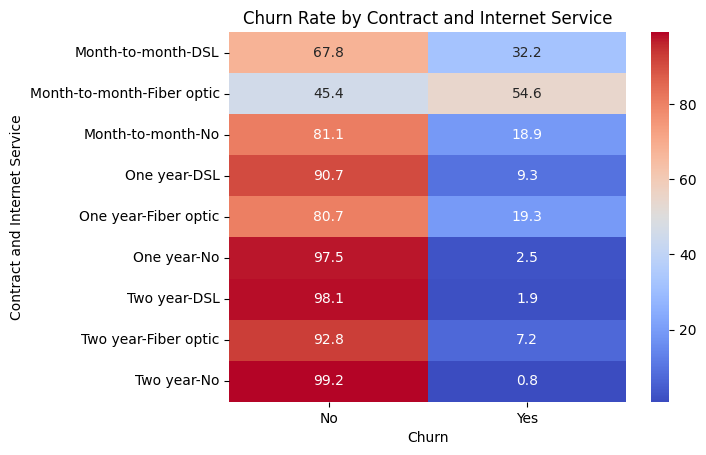

In [67]:
crosstab_result = pd.crosstab([data['Contract'], data['InternetService']], data['Churn'], normalize='index') * 100
sns.heatmap(crosstab_result, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Churn Rate by Contract and Internet Service')
plt.ylabel('Contract and Internet Service')
plt.xlabel('Churn')
plt.show()

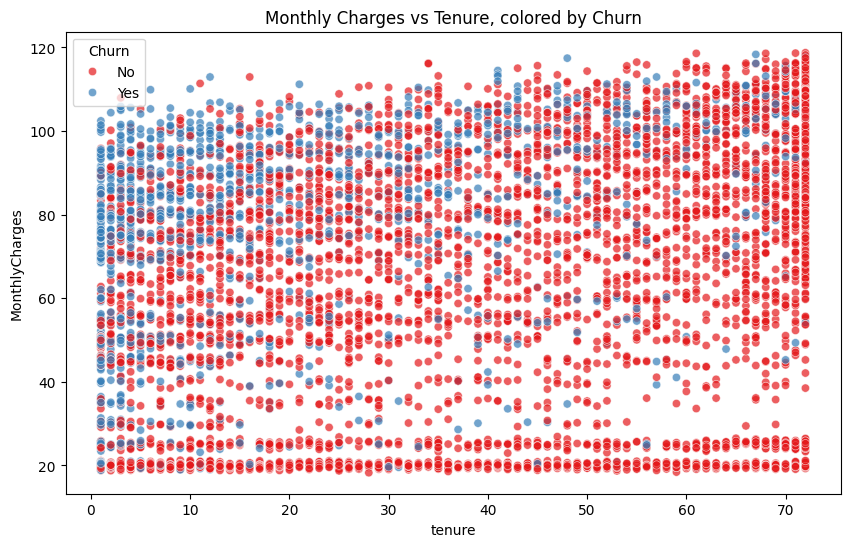

In [68]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='tenure', y='MonthlyCharges', hue='Churn', alpha=0.7, palette='Set1')
plt.title('Monthly Charges vs Tenure, colored by Churn')
plt.show()

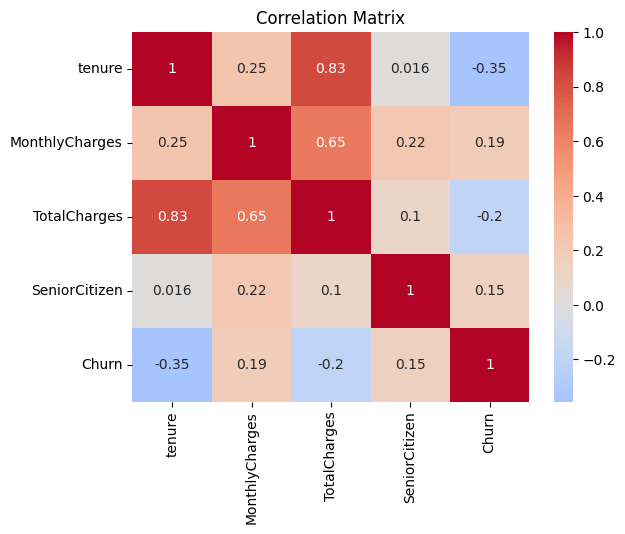

In [69]:
df_encoded = data.copy()
df_encoded['Churn'] = df_encoded['Churn'].map({'No': 0, 'Yes': 1})
df_encoded['SeniorCitizen'] = df_encoded['SeniorCitizen'].astype(int)

# Correlation with numerical features
corr = df_encoded[['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen', 'Churn']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

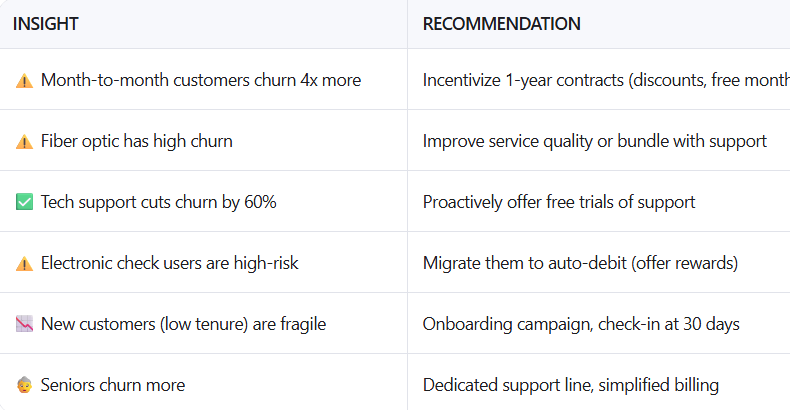


In [70]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


##Modeling

In [71]:
!pip install catboost

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)

In [73]:
df = data.copy()
df.drop('customerID', axis=1, inplace=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(0, inplace=True)

##Feature Engineering

In [74]:
# Binary mappings
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# Target
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Gender
df['gender'] = df['gender'].map({'Female': 1, 'Male': 0})

# Tenure groups
df['tenure_group'] = pd.cut(df['tenure'], bins=[0, 12, 36, 72], labels=['New', 'Mid', 'Long']).astype(str)

# Services count
service_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport', 'StreamingTV', 'StreamingMovies']
df['NumServices'] = df[service_cols].replace({'Yes':1, 'No':0, 'No internet service':0}).sum(axis=1)

# Contract encoding
contract_map = {'Month-to-month': 0, 'One year': 1, 'Two year': 2}
df['ContractNum'] = df['Contract'].map(contract_map)

# Payment method risk
payment_risk = {
    'Electronic check': 3,
    'Mailed check': 2,
    'Bank transfer (automatic)': 1,
    'Credit card (automatic)': 1
}
df['PaymentRisk'] = df['PaymentMethod'].map(payment_risk)

# Fiber + No Support flag
df['HasFiberAndNoSupport'] = ((df['InternetService'] == 'Fiber optic') &
                              (df['TechSupport'] == 'No')).astype(int)

In [75]:
num_features = [
    'tenure', 'MonthlyCharges',
    'NumServices', 'ContractNum', 'PaymentRisk', 'HasFiberAndNoSupport'
]

cat_features = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'tenure_group', 'Contract',
    'PaperlessBilling', 'PaymentMethod'
]

target = 'Churn'

X = df.drop(target, axis=1)
y = df[target]

In [76]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_features)
])

In [77]:
def get_models(y):
    # Class weight for imbalance
    scale_pos_weight = y.value_counts()[0] / y.value_counts()[1]

    models = {
        "Logistic Regression": Pipeline([
            ('preprocessor', preprocessor),
            ('classifier', CalibratedClassifierCV(
                LogisticRegression(penalty='l2', C=1.0, class_weight='balanced', max_iter=1000, random_state=42),
                cv=3
            ))
        ]),

        "Random Forest": Pipeline([
            ('preprocessor', preprocessor),
            ('classifier', CalibratedClassifierCV(
                RandomForestClassifier(class_weight='balanced', n_estimators=300, random_state=42),
                cv=3
            ))
        ]),

        "XGBoost": Pipeline([
            ('preprocessor', preprocessor),
            ('classifier', XGBClassifier(
                scale_pos_weight=scale_pos_weight,
                eval_metric='logloss', use_label_encoder=False, random_state=42
            ))
        ]),

        "LightGBM": Pipeline([
            ('preprocessor', preprocessor),
            ('classifier', LGBMClassifier(
                class_weight='balanced',
                random_state=42
            ))
        ]),

        "CatBoost": Pipeline([
            ('preprocessor', preprocessor),
            ('classifier', CatBoostClassifier(
                scale_pos_weight=scale_pos_weight,
                verbose=0, random_state=42
            ))
        ]),

        "Gradient Boosting": Pipeline([
            ('preprocessor', preprocessor),
            ('classifier', GradientBoostingClassifier(random_state=42))
        ])
    }
    return models

In [78]:
def evaluate_models(X, y, models, cv_splits=5):
    skf = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=42)
    results = []

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

    print("Starting Model Evaluation...\n")

    for name, model in models.items():
        print(f"Training {name}...")

        try:
            cv_auc = cross_val_score(model, X_train, y_train, cv=skf, scoring='roc_auc')
            cv_mean = cv_auc.mean()
            cv_std = cv_auc.std()

            model.fit(X_train, y_train)

            y_proba = model.predict_proba(X_test)[:, 1]
            test_auc = roc_auc_score(y_test, y_proba)

            y_pred = model.predict(X_test)
            report = classification_report(y_test, y_pred, output_dict=True)
            precision = report['1']['precision']
            recall = report['1']['recall']
            f1 = report['1']['f1-score']

            results.append({
                'Model': name,
                'CV_AUC': cv_mean,
                'CV_Std': cv_std,
                'Test_AUC': test_auc,
                'Precision': precision,
                'Recall': recall,
                'F1': f1,
                'Model_Object': model
            })

            print(f"CV AUC: {cv_mean:.3f} ± {cv_std:.3f} | Test AUC: {test_auc:.3f}\n")

        except Exception as e:
            print(f"Failed: {e}\n")
            continue

    results_df = pd.DataFrame(results).sort_values('Test_AUC', ascending=False).reset_index(drop=True)
    return results_df, X_test, y_test


In [79]:
models = get_models(y)
results_df, X_test, y_test = evaluate_models(X, y, models)

print("\nFINAL MODEL COMPARISON")
print(results_df[['Model', 'CV_AUC', 'Test_AUC', 'Precision', 'Recall', 'F1']])


Starting Model Evaluation...

Training Logistic Regression...
CV AUC: 0.846 ± 0.006 | Test AUC: 0.834

Training Random Forest...
CV AUC: 0.828 ± 0.013 | Test AUC: 0.821

Training XGBoost...
CV AUC: 0.822 ± 0.012 | Test AUC: 0.807

Training LightGBM...
[LightGBM] [Info] Number of positive: 1196, number of negative: 3304
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000576 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 381
[LightGBM] [Info] Number of data points in the train set: 4500, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 1196, number of negative: 3304
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000514 seconds.
You can set `force_row_

In [80]:
# Pick best by Test AUC
champion_idx = results_df['Test_AUC'].idxmax()
champion = results_df.loc[champion_idx]

print(f"\n Champion Model: {champion['Model']}")
print(f"   Test AUC: {champion['Test_AUC']:.3f}")
print(f"   Precision: {champion['Precision']:.3f}, Recall: {champion['Recall']:.3f}")

best_model = champion['Model_Object']


 Champion Model: Gradient Boosting
   Test AUC: 0.839
   Precision: 0.650, Recall: 0.527



 Final Model: Gradient Boosting
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1033
           1       0.65      0.53      0.58       374

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



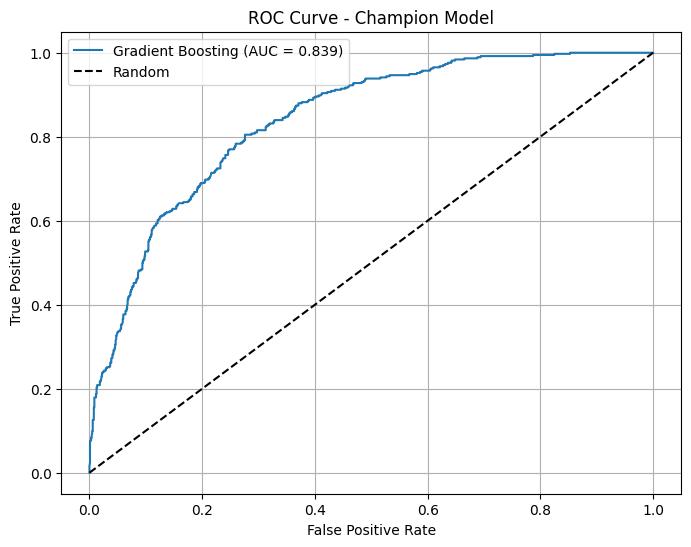

In [81]:
y_proba = best_model.predict_proba(X_test)[:, 1]
y_pred = best_model.predict(X_test)

print(f"\n Final Model: {champion['Model']}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"{champion['Model']} (AUC = {roc_auc_score(y_test, y_proba):.3f})")
plt.plot([0,1], [0,1], 'k--', label='Random')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Champion Model')
plt.legend(); plt.grid(True); plt.show()

##Testing

In [83]:
def churn_risk_scoring_pipeline(df_raw, model, preprocessor):
    df = df_raw.copy()

    # Clean
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    df['TotalCharges'].fillna(0, inplace=True)

    # Feature engineering
    df['NumServices'] = df[service_cols].replace({'Yes':1, 'No':0, 'No internet service':0}).sum(axis=1)
    df['ContractNum'] = df['Contract'].map({'Month-to-month': 0, 'One year': 1, 'Two year': 2})
    df['PaymentRisk'] = df['PaymentMethod'].map({'Electronic check': 3, 'Mailed check': 2, 'Bank transfer (automatic)': 1, 'Credit card (automatic)': 1})
    df['HasFiberAndNoSupport'] = ((df['InternetService'] == 'Fiber optic') & (df['TechSupport'] == 'No')).astype(int)
    df['tenure_group'] = pd.cut(df['tenure'], bins=[0,12,36,72], labels=['New','Mid','Long']).astype(str)

    # Encode binary
    for col in ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']:
        df[col] = df[col].map({'Yes':1, 'No':0})
    df['gender'] = df['gender'].map({'Female':1, 'Male':0})

    # Predict
    X = df.drop(['Churn'], axis=1, errors='ignore')
    churn_prob = model.predict_proba(X)[:, 1]

    result = df[['tenure', 'MonthlyCharges']].copy()
    result['ChurnProbability'] = churn_prob
    result['RiskLevel'] = pd.cut(churn_prob, bins=[0, 0.25, 0.5, 0.75, 1], labels=['Low', 'Medium', 'High', 'Critical'])

    return result

In [84]:
scores = churn_risk_scoring_pipeline(df, best_model, preprocessor)
print(scores['RiskLevel'].value_counts())

RiskLevel
Low         3911
Medium      1685
High        1148
Critical     288
Name: count, dtype: int64


#Checking that how much tenure affecting that predictions

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

X_simple = df[['tenure']]
y = df['Churn']

# Train
model_simple = LogisticRegression()
model_simple.fit(X_simple, y)

# Predict
y_pred_proba = model_simple.predict_proba(X_simple)[:, 1]
auc_simple = roc_auc_score(y, y_pred_proba)
print(f"Simple model AUC (only tenure): {auc_simple:.3f}")

Simple model AUC (only tenure): 0.741


In [86]:
print("Features in model:")
print(X.columns.tolist())

Features in model:
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'tenure_group', 'NumServices', 'ContractNum', 'PaymentRisk', 'HasFiberAndNoSupport']


#Joblib

In [92]:
import joblib
import os

# Create 'models' directory if it doesn't exist
if not os.path.exists('models'):
    os.makedirs('models')

joblib.dump(best_model, 'models/champion_model.pkl')
joblib.dump(preprocessor, 'models/preprocessor.pkl')

['models/preprocessor.pkl']

##Customer Segmentation


In [90]:
# segmentation.py
import joblib
from sklearn.cluster import KMeans
import os

# Features for clustering
cluster_features = [
    'tenure', 'MonthlyCharges', 'NumServices',
    'ContractNum', 'PaymentRisk', 'SeniorCitizen', 'Partner'
]
X_cluster = df[cluster_features]

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Elbow method
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias, 'o-')
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.axvline(x=4, color='red', linestyle='--', label='k=4')
plt.legend()
plt.savefig('elbow_plot.png')
plt.close()

# Final K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
df['Segment'] = kmeans.fit_predict(X_scaled)

# Create 'models' directory if it doesn't exist
if not os.path.exists('models'):
    os.makedirs('models')

# Save models
joblib.dump(kmeans, 'models/kmeans.pkl')
joblib.dump(scaler, 'models/scaler.pkl')

# Print segment profiles
print(df.groupby('Segment')[cluster_features].mean())

            tenure  MonthlyCharges  NumServices  ContractNum  PaymentRisk  \
Segment                                                                     
0        57.233718       88.090152     4.174895     1.373424     1.505777   
1        42.380389       25.289603     0.274725     1.526627     1.448859   
2        28.037487       79.336170     2.071935     0.202634     2.277609   
3        13.931034       60.755561     1.356660     0.074713     2.209939   

         SeniorCitizen   Partner  
Segment                           
0             0.067227  0.742647  
1             0.022823  0.629755  
2             1.000000  0.453901  
3             0.000000  0.265720  


#Shap Explain

In [95]:
# shap_analysis.py
import shap
import joblib
import pandas as pd
import matplotlib.pyplot as plt

# Load model and preprocessor
model = joblib.load('models/champion_model.pkl')
preprocessor = joblib.load('models/preprocessor.pkl')

# Load data sample
df_raw = pd.read_csv('/content/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df_raw['Churn'] = df_raw['Churn'].map({'Yes': 1, 'No': 0})

X = df_raw.drop('Churn', axis=1)

# Transform test data
X_test_sample = X.iloc[:100].copy() # small sample for speed

# Apply feature engineering to X_test_sample
# Clean
X_test_sample['TotalCharges'] = pd.to_numeric(X_test_sample['TotalCharges'], errors='coerce')
X_test_sample['TotalCharges'].fillna(0, inplace=True)

# Feature engineering
service_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport', 'StreamingTV', 'StreamingMovies'] # Define service_cols again
X_test_sample['NumServices'] = X_test_sample[service_cols].replace({'Yes':1, 'No':0, 'No internet service':0}).sum(axis=1)
X_test_sample['ContractNum'] = X_test_sample['Contract'].map({'Month-to-month': 0, 'One year': 1, 'Two year': 2})
X_test_sample['PaymentRisk'] = X_test_sample['PaymentMethod'].map({'Electronic check': 3, 'Mailed check': 2, 'Bank transfer (automatic)': 1, 'Credit card (automatic)': 1})
X_test_sample['HasFiberAndNoSupport'] = ((X_test_sample['InternetService'] == 'Fiber optic') & (X_test_sample['TechSupport'] == 'No')).astype(int)
X_test_sample['tenure_group'] = pd.cut(X_test_sample['tenure'], bins=[0,12,36,72], labels=['New','Mid','Long'], right=False).astype(str) # Added right=False to match previous definition

# Encode binary
for col in ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']:
    X_test_sample[col] = X_test_sample[col].map({'Yes':1, 'No':0})
X_test_sample['gender'] = X_test_sample['gender'].map({'Female':1, 'Male':0})


X_transformed = preprocessor.transform(X_test_sample)


# Get feature names
cat_encoder = preprocessor.named_transformers_['cat']
num_features = ['tenure', 'MonthlyCharges', 'NumServices', 'ContractNum', 'PaymentRisk', 'HasFiberAndNoSupport']
cat_features = cat_encoder.get_feature_names_out().tolist()
feature_names = num_features + cat_features

# SHAP explanation
explainer = shap.Explainer(model['classifier'], feature_names=feature_names)
shap_values = explainer(X_transformed)

# Plot
shap.summary_plot(shap_values, feature_names=feature_names, show=False)
plt.savefig('shap_summary.png', bbox_inches='tight')
plt.close()